In [1]:
#import necessary modules

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, assemble, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

import numpy as np

In [2]:
def initialise_grid():

    positions_o = [0,1]
    positions_x = [2]
    entangled_pairs = [(3,4), (5,6), (7,8)]

    return positions_o, positions_x, entangled_pairs

In [3]:
def create_singular_gridList(posO, posX, ePairs):
    gridList = [0,0,0,0,0,0,0,0,0]

    for i in range(len(posO)):
        gridList[posO[i]] = 0

    for i in range(len(posX)):
        gridList[posX[i]] = 1


    entangledNum = 1
    for i in range(len(ePairs)):
        gridList[ePairs[i][0]]='e'+str(entangledNum)   
        gridList[ePairs[i][1]]='e'+str(entangledNum)
        entangledNum +=1

    return gridList


In [4]:
def showGrid(grid):
    print('This the initial table state inputed by the user:\n0 corresponds to player O, 1 corresponds to player X,\n e1,e2,e3... corresponds to entangled tiles')
    print('--------\n'+str(grid[6])+'|'+str(grid[7])+'|'+str(grid[8]))
    print('--------\n'+str(grid[3])+'|'+str(grid[4])+'|'+str(grid[5]))
    print('--------\n'+str(grid[0])+'|'+str(grid[1])+'|'+str(grid[2]))
    print('--------')

In [5]:
pO, pX, eP = initialise_grid()

In [6]:
allStateGrid = create_singular_gridList(pO, pX, eP)

In [7]:
showGrid(allStateGrid)

This the initial table state inputed by the user:
0 corresponds to player O, 1 corresponds to player X,
 e1,e2,e3... corresponds to entangled tiles
--------
e2|e3|e3
--------
e1|e1|e2
--------
0|0|1
--------


In [8]:
def create_quantumCircuit(finalGrid, pO, pX, eP):
    #Quantum circuit to represent the tiles
    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(9, 9)
    circuit.name = "Tic tac toe"

    #all player O gates are already |0>

    #making all player X gates |1>
    for i in range(len(pX)):
        circuit.x(pX[i])

    #creating entangled pairs. Set one to hadamard, cnot it with another that has X gate - so if Hadamard is 1, other is flipped to 0
    for i in range(len(eP)):
        circuit.h(eP[i][0]) #hardamard gate on line 1
        circuit.x(eP[i][1]) #x gate on line 2
        circuit.cx(eP[i][0], eP[i][1]) #cnot between line 1 and line 2

    circuit.measure(list(range(9)), list(range(9)))

    return circuit

In [9]:
def probabilityToAngle(player, p):
    if player == 'Y':
        #this is returns the angle for the probability of it being 0.
        return ((np.pi/100) * (100 - p))
    else:
        return ((np.pi/100) * (p))

In [10]:
testArray = [[0, 30, 'X'], [2, 30, 'Y'], [6, 50, 'X'], [5, 50, 'Y'], [8, 70, 'X'], [3, 70, 'Y'], [4, 40, 'X'], [7, 40, 'Y'], [3, 100, 'X']]
#testArray2 = [[6, 70, 'Y'], [4, 30, 'X'], [0, 70, 'X'], [8, 30, 'Y'], [7, 60, 'Y'], [2, 40, 'X'], [5, 50, 'X'], [1, 50, 'Y'], [3, 100, 'X']]

#The probabilities do not add up. there are some un entangled pairs

def convert_to_nice_grid(ticTacGrid):
    entangledArray = []
    xStateArray = []
    oStateArray = []

    lenGrid = len(ticTacGrid)
    for i in range(0,lenGrid-1,2):
        #print(i)
        entangledArray.append( (ticTacGrid[i], ticTacGrid[i+1]) )

    if (ticTacGrid[8][2] == 'X'):
        xStateArray.append(ticTacGrid[8])
    else:
        oStateArray.append(ticTacGrid[8])
        
    return entangledArray, xStateArray, oStateArray

eA, xSA, oSA = convert_to_nice_grid(testArray)
print(eA, xSA, oSA)


'''
want to get form entangled-array, x-state-array, o-state-array
entangled-array = [ (x_grid_loc, y_grid_loc, x_prob) ]
x-state-array = [grid-loc]
o-state-array = [grid-loc]
'''


[([0, 30, 'X'], [2, 30, 'Y']), ([6, 50, 'X'], [5, 50, 'Y']), ([8, 70, 'X'], [3, 70, 'Y']), ([4, 40, 'X'], [7, 40, 'Y'])] [[3, 100, 'X']] []


'\nwant to get form entangled-array, x-state-array, o-state-array\nentangled-array = [ (x_grid_loc, y_grid_loc, x_prob) ]\nx-state-array = [grid-loc]\no-state-array = [grid-loc]\n'

In [11]:
#X has to start for this method to work

def create_quantumCircuit_rx(pO, pX, entangledArray):
    #Quantum circuit to represent the tiles
    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(9, 9)
    circuit.name = "Tic tac toe"

    #all player O gates are already |0>

    #making all player X gates |1>
    if (len(pX) > 0):
        circuit.x(pX[0][0])

    #creating entangled pairs. Set one to hadamard, cnot it with another that has X gate - so if Hadamard is 1, other is flipped to 0
    for i in range(len(entangledArray)):
        tempProb = probabilityToAngle('X', entangledArray[i][0][1])
        circuit.rx(tempProb, entangledArray[i][0][0]) #line 1 set to correct angle
        #circuit.h(eP[i][0]) #hardamard gate on line 1
        circuit.x(entangledArray[i][1][0]) #x gate on line 2
        circuit.cx(entangledArray[i][0][0], entangledArray[i][1][0]) #cnot between line 1 and line 2

    circuit.measure(list(range(9)), list(range(9)))

    return circuit

This is the corresponding quantum circuit from the users input


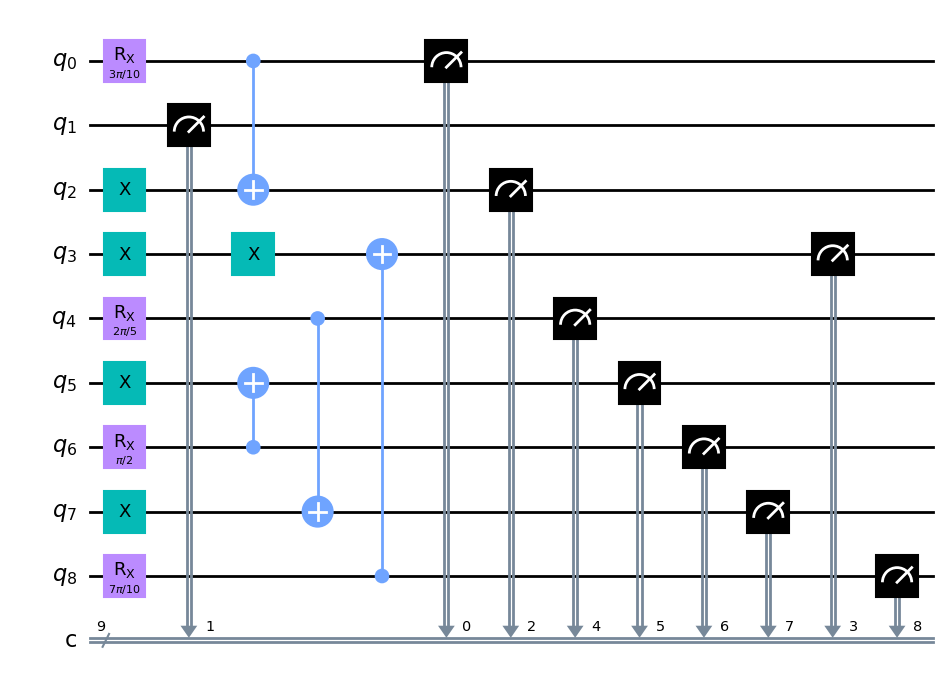

In [12]:
eA, xSA, oSA = convert_to_nice_grid(testArray)

qCircuit = create_quantumCircuit_rx(oSA, xSA, eA)

# Print out the circuit
print('This is the corresponding quantum circuit from the users input')
#draw circuit
qCircuit.draw(output='mpl', filename='circuit.png')

In [13]:
# Check winner
def check_winner(board,mark):
    return(((board[0]==mark) and (board[1]== mark) and (board[2]==mark) )or #for row1 

            ((board[3]==mark) and (board[4]==mark) and (board[5]==mark) )or #for row2

            ((board[6]==mark) and (board[7]==mark) and (board[8]==mark) )or #for row3

            ((board[0]==mark) and (board[3]==mark) and (board[6]== mark) )or #for Colm 1 

            ((board[1]==mark) and (board[4]==mark) and (board[7]==mark) )or #for Colm 2

            ((board[2]==mark) and (board[5]==mark) and (board[8]==mark) )or #for colm 3

            ((board[0]==mark) and (board[4]==mark) and (board[8]==mark) )or #diagonal 1

            ((board[2]==mark) and (board[4]==mark) and (board[6]==mark) )) #diagonal 2



In [14]:
def runGame():

    flag_p1=1 
    flag_p2=0

    while (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
        print('Running the quantum circuit...')
        flag_p1=0 
        flag_p2=0

        #collapse states
        job = execute(qCircuit, BasicAer.get_backend('qasm_simulator'), shots=1)
        result = job.result()
        l_final_ordered=list(map(lambda x: int(x),list(list(result.get_counts().keys())[0][::-1])))
        print(l_final_ordered)
        #list with ordered cells
        print('The colapsed state is:')
        print('-----\n'+str(l_final_ordered[6])+'|'+str(l_final_ordered[7])+'|'+str(l_final_ordered[8]))
        print('-----\n'+str(l_final_ordered[3])+'|'+str(l_final_ordered[4])+'|'+str(l_final_ordered[5]))
        print('-----\n'+str(l_final_ordered[0])+'|'+str(l_final_ordered[1])+'|'+str(l_final_ordered[2]))
        print('-----')

        if (check_winner(l_final_ordered,0) ):## to check if player 1 won
            print('Player 1 won!')
            flag_p1 = 1
        else:
            flag_p1 = 0

        if (check_winner(l_final_ordered,1)): ## to check if player 2 won
            print('Player 2 won!')
            flag_p2 = 1
        else:
            flag_p2 = 0

        if (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
            break

        if flag_p1 and flag_p2:
            print('The game will repeat until one one player wins')

        if not(flag_p1 and flag_p2):
            print('No winners,\nThe game will repeat until one one player wins')

In [15]:
runGame()

Running the quantum circuit...
[1, 0, 0, 1, 0, 1, 0, 1, 1]
The colapsed state is:
-----
0|1|1
-----
1|0|1
-----
1|0|0
-----
Player 1 won!
